## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?


In [68]:
import pandas as pd

df = pd.read_csv('dataset.csv') 
officesupplies = df[df['Categoria'] == 'Office Supplies']
groupcity = officesupplies.groupby('Cidade')['Valor_Venda'].sum()
print(groupcity.idxmax())
print(groupcity.sort_values(ascending=False))

print(pd.read_csv('dataset.csv')[pd.read_csv('dataset.csv')['Categoria'] == 'Office Supplies'].groupby('Cidade')['Valor_Venda'].sum().idxmax()) # codico em uma só linha

New York City
Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64
New York City


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64


Text(0, 0.5, 'Valor das vendas')

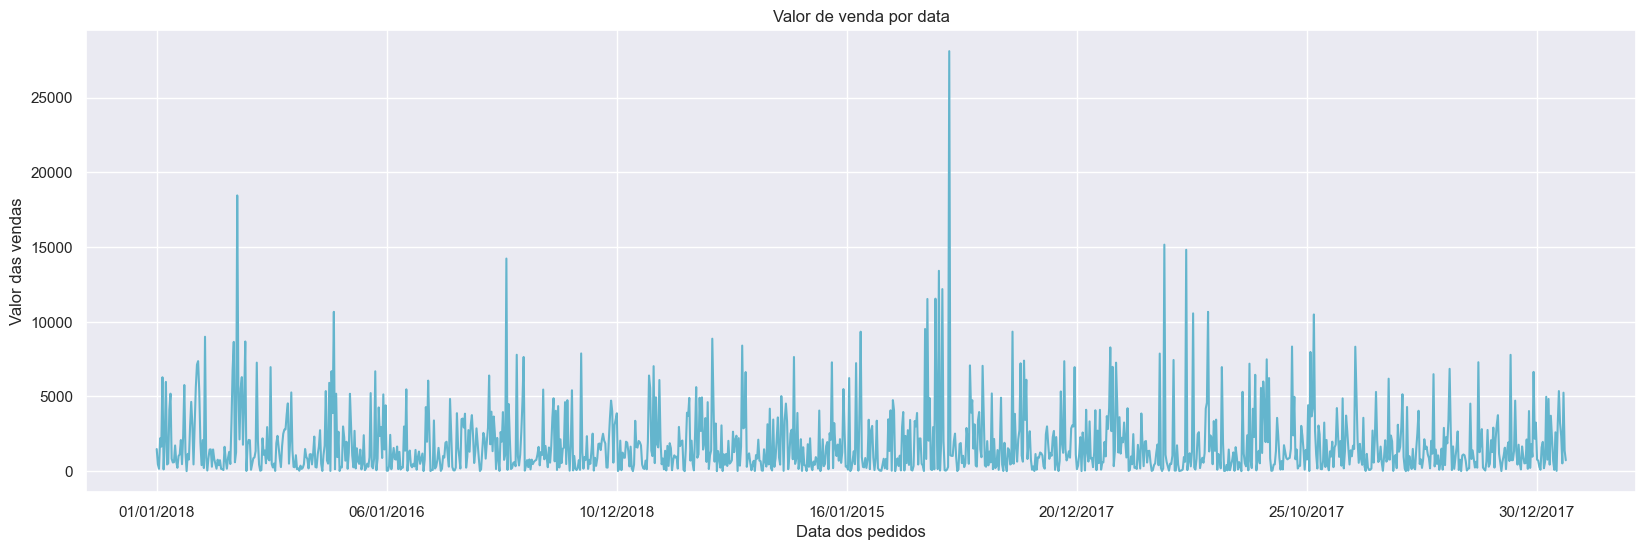

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('dataset.csv')
dategroup = df.groupby('Data_Pedido')['Valor_Venda'].sum()
print(dategroup.head())

plt.figure(figsize=(20, 6))
dategroup.plot(color = 'c')
plt.title('Valor de venda por data')
plt.xlabel('Data dos pedidos')
plt.ylabel('Valor das vendas')

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

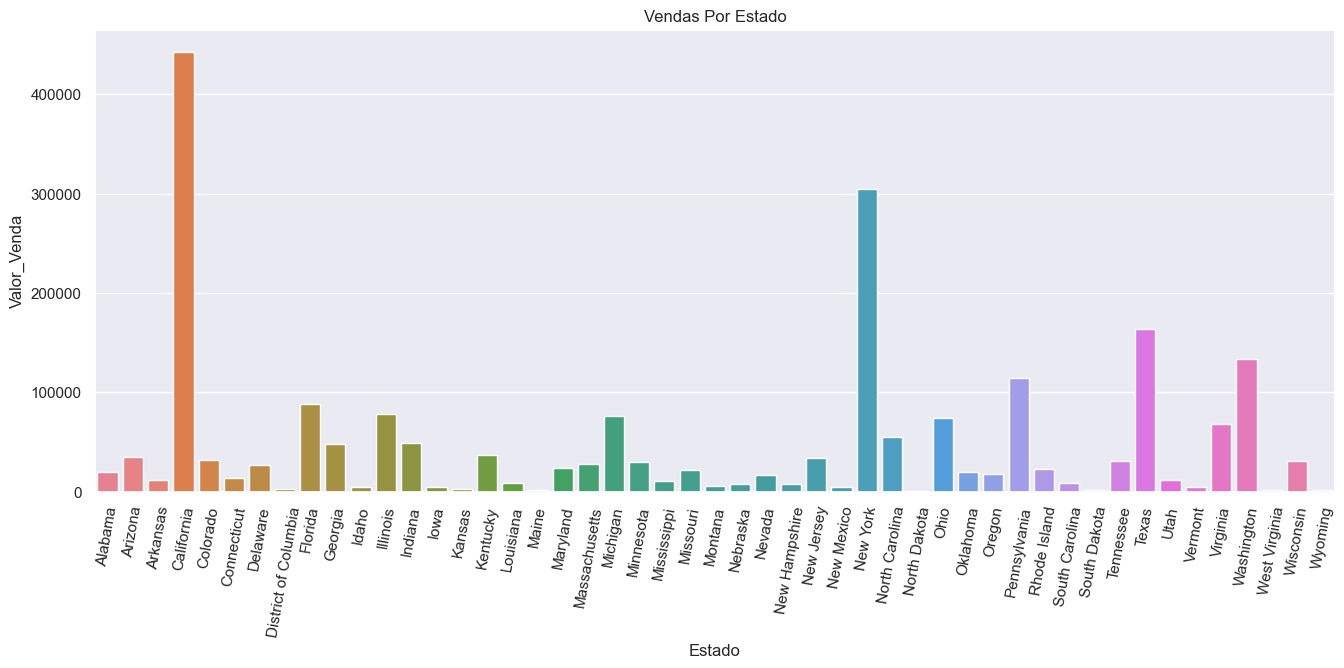

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

df = pd.read_csv('dataset.csv')
gbestado = df.groupby('Estado')['Valor_Venda'].sum().reset_index()

plt.figure(figsize = (16, 6))
sns.barplot(data = gbestado, 
            y = 'Valor_Venda', 
            x = 'Estado',
            palette = "husl").set(title = 'Vendas Por Estado')
plt.xticks(rotation = 80)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

               Valor_Venda
Cidade                    
New York City  251749.2190
Los Angeles    171654.6330
Seattle        114725.4780
San Francisco  107489.9520
Philadelphia   107197.8030
Houston         61590.1868
San Diego       47458.3790
Chicago         46974.3430
Jacksonville    44713.1830
Detroit         42446.9440


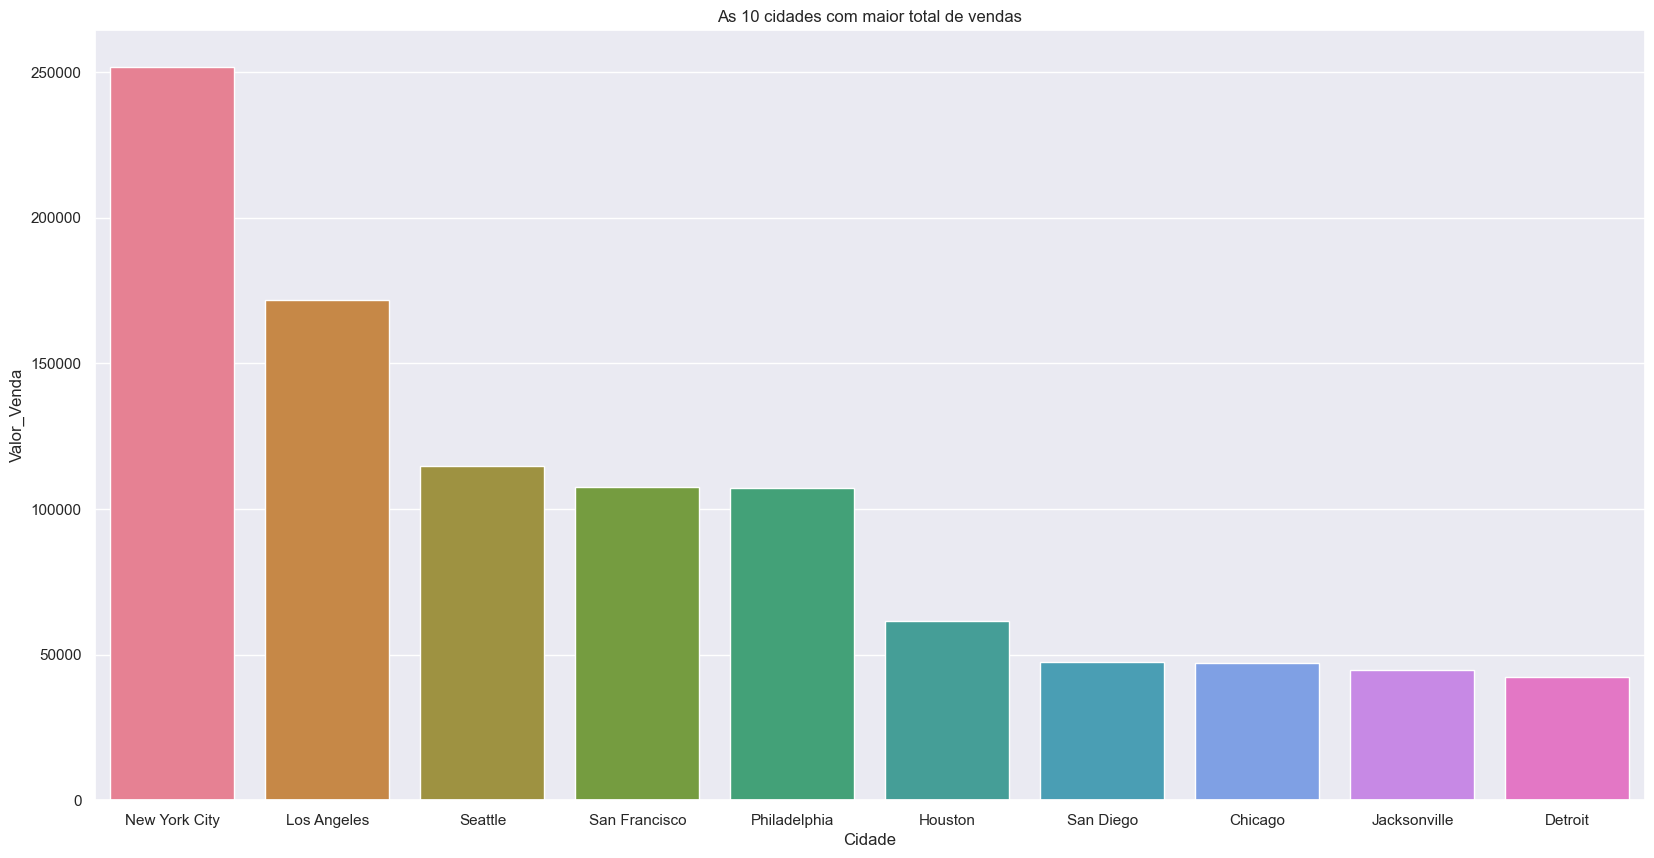

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

df = pd.read_csv('dataset.csv')
cities = pd.DataFrame(df.groupby('Cidade')['Valor_Venda'].sum().sort_values(ascending=False)[:10])
print(cities.head(10))

plt.figure(figsize=(20, 10))
sns.barplot(data = cities, x = 'Cidade', y = 'Valor_Venda', palette = 'husl').set(title = 'As 10 cidades com maior total de vendas')
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

      Segmento  Valor_Venda
0     Consumer  1133834.335
1    Corporate   679232.187
2  Home Office   422491.433


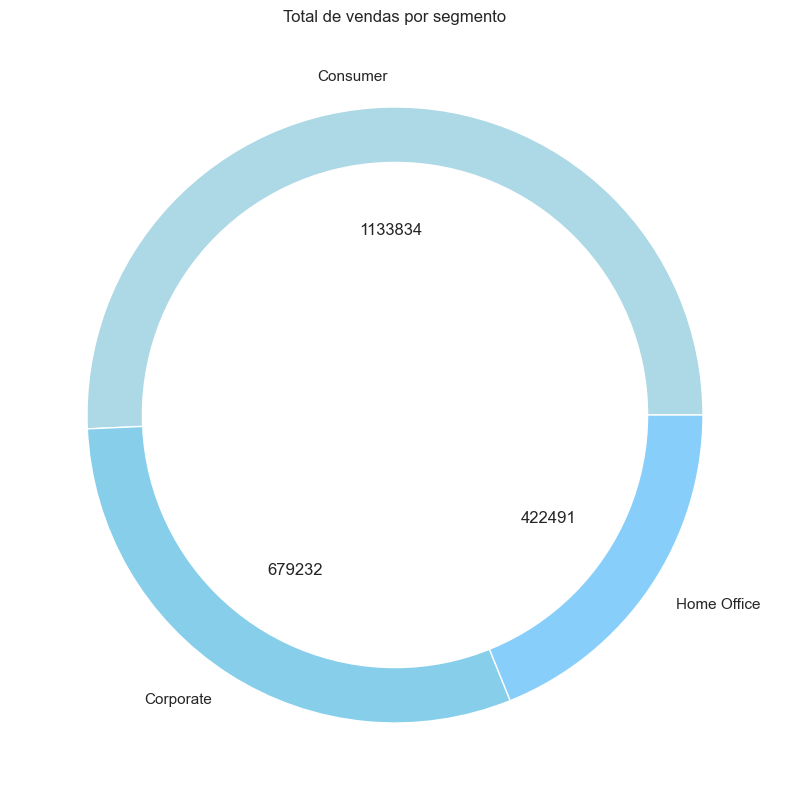

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sea
warnings.filterwarnings("ignore")

def autopct_value(value):
    def my_format(pct):
        val = int(round(pct * sum(value) / 100))
        return val
    return my_format

df = pd.read_csv('dataset.csv')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
gbseg = df.groupby('Segmento')['Valor_Venda'].sum().reset_index()
print(gbseg)

plt.figure(figsize=(10, 10))

plt.pie(gbseg['Valor_Venda'], labels = gbseg['Segmento'], autopct=autopct_value(gbseg['Valor_Venda']), colors=['lightblue', 'skyblue', 'lightskyblue'])
plt.title('Total de vendas por segmento')

fig = plt.gcf()
fig.gca().add_artist(plt.Circle((0,0), 0.82, fc = 'white'))
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sea
warnings.filterwarnings("ignore")

df = pd.read_csv('dataset.csv')
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst = True)
df['Ano'] = df['Data_Pedido'].dt.year
df2 = df.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()

print(df2)

Ano   Segmento   
2015  Consumer      256719.917
      Corporate     125819.596
      Home Office    88229.088
2016  Consumer      265295.259
      Corporate     114643.123
      Home Office    74134.133
2017  Consumer      288459.557
      Corporate     203266.740
      Home Office   103639.627
2018  Consumer      323359.602
      Corporate     235502.728
      Home Office   156488.585
Name: Valor_Venda, dtype: float64


## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sea
import numpy as np
warnings.filterwarnings("ignore")

df = pd.read_csv('dataset.csv')
df['Desconto'] = np.where(df['Valor_Venda'] > 1000, 0.15, 0.10)
df['Desconto'].value_counts()

Desconto
0.100    9243
0.150     457
Name: count, dtype: int64

## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [144]:
print(df[df['Desconto'] == 0.15]['Valor_Venda'].mean())
df['Valor_Venda_Desconto'] = (1 - df['Desconto']) * df['Valor_Venda']
print(df[df['Desconto'] == 0.15]['Valor_Venda_Desconto'].mean())

2116.8078153172864
1799.2866430196934


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

    Ano  Mes     Segmento  Valor_Venda
0  2015    1     Consumer      146.737
1  2015    1    Corporate      130.887
2  2015    1  Home Office      329.856
3  2015    2     Consumer      117.328
4  2015    2    Corporate       69.235


<Figure size 1200x600 with 0 Axes>

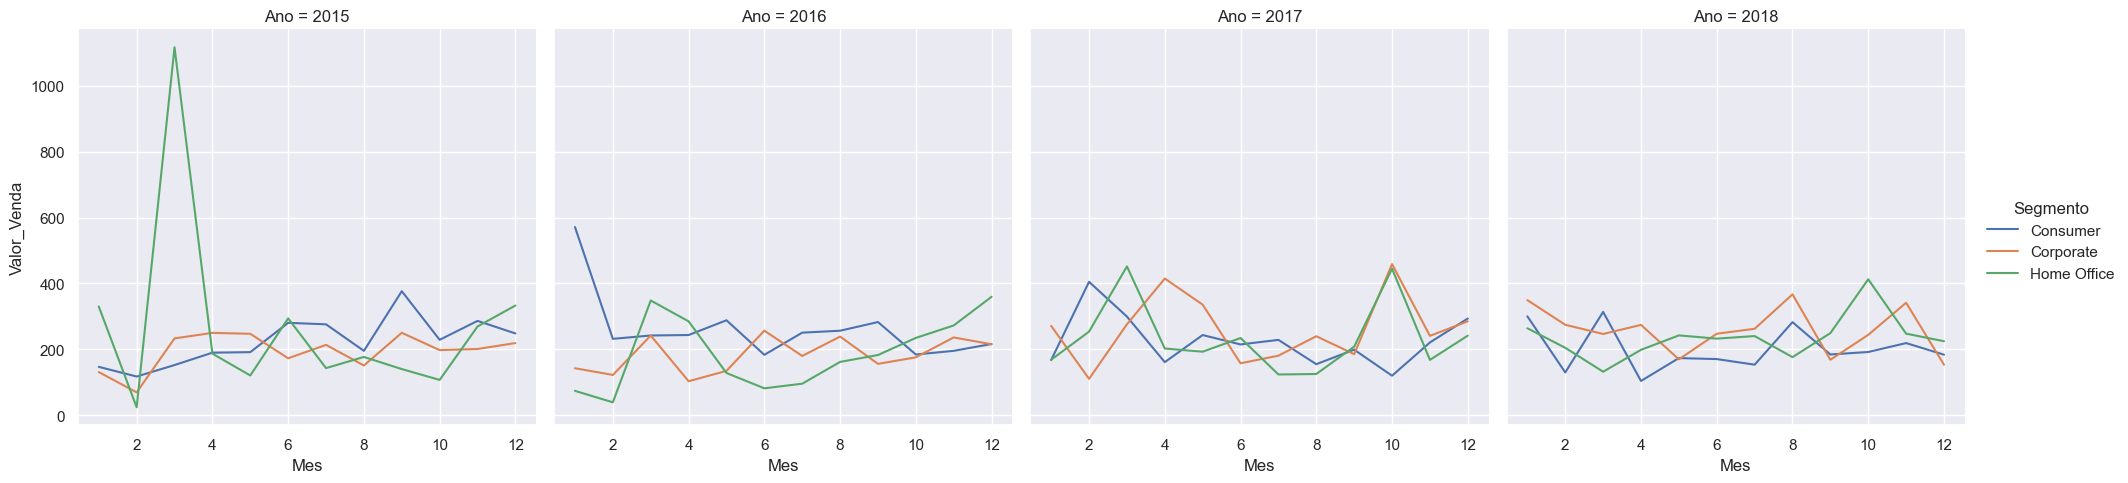

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import numpy as np
warnings.filterwarnings("ignore")

#plt.plot(x, y, label = 'Gráfico com Matplotlib')

df = pd.read_csv('dataset.csv')

df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst = True)
df['Ano'] = df['Data_Pedido'].dt.year
df['Mes'] = df['Data_Pedido'].dt.month

df_gp = df.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].mean().reset_index()
print(df_gp.head())

plt.figure(figsize = (12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = df_gp, 
                   y = 'Valor_Venda', 
                   x = 'Mes',
                   hue = 'Segmento', 
                   col = 'Ano',
                   col_wrap = 4)
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

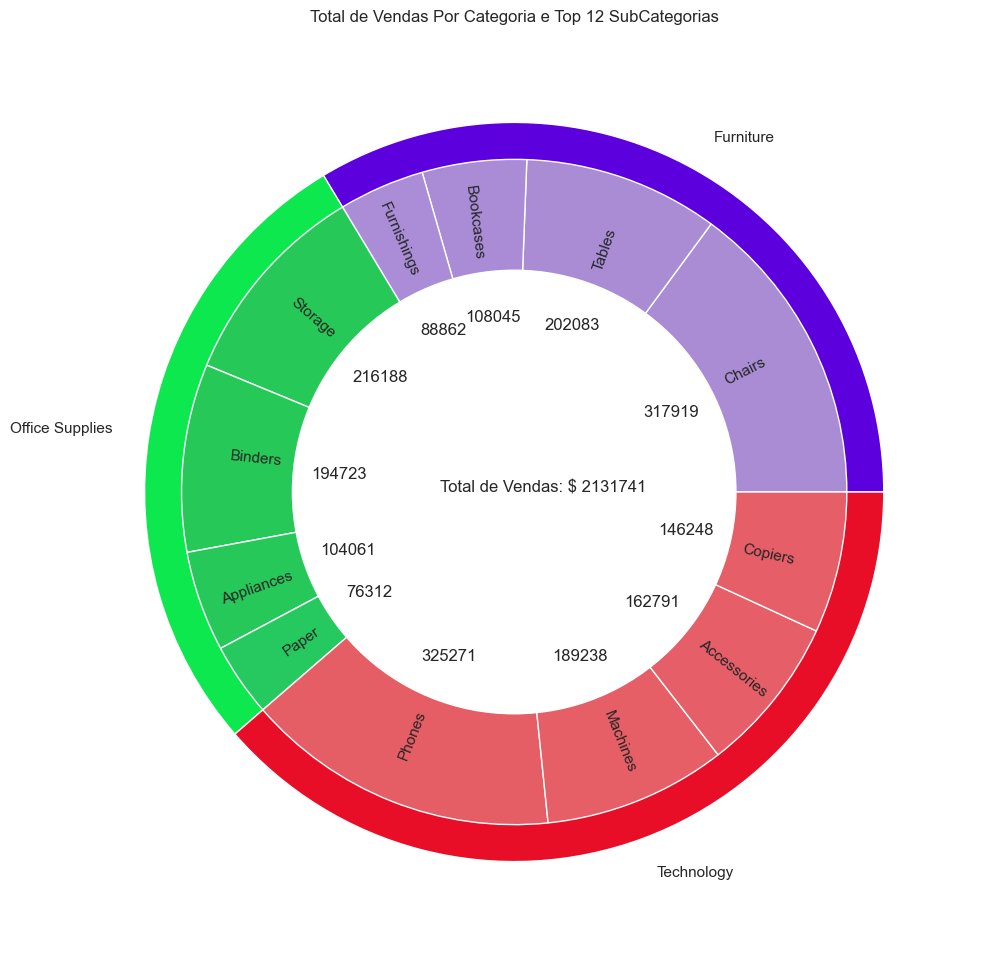

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import numpy as np
warnings.filterwarnings("ignore")

def autopct_format(value):
    def my_format(pct):
        val = int(round(pct * sum(value) / 100))
        return val
    return my_format

df = pd.read_csv('dataset.csv')

df = df.groupby(['Categoria', 'SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda', ascending = False)[:12]
df = df[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()

dfcat = df.groupby('Categoria').sum(numeric_only = True).reset_index()

cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

fig, ax = plt.subplots(figsize = (18,12))

p1 = ax.pie(dfcat['Valor_Venda'], 
            radius = 1,
            labels = dfcat['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

p2 = ax.pie(df['Valor_Venda'],
            radius = 0.9,
            labels = df['SubCategoria'],
            autopct = autopct_format(df['Valor_Venda']),
            colors = cores_subcategorias, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()

# Fim